# 1. Importing Libraries and Loading Dataframe

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
path = r'C:\Users\marig\OneDrive\Área de Trabalho\curso arbeitsamt\data immersion\achievement 6\data sources\final project\Data\Prepared Data'

In [59]:
food_df = pd.read_csv (os.path.join (path, 'food_safety_time_series.csv'))

In [101]:
food_df.head()

,Year,Number of Illnesses
0,2011,2
1,2011,2
2,2011,7
3,2011,2
4,2011,8


My original Dataset already had time series (year and number of illnesses, hospitalizations and deaths). Each data point corresponds to the date when the given outbreak ocurred and the corresponding number of illnesses, hospitalizations and deaths ocurred.

In [102]:
food_df.shape

(8703, 2)

In [103]:
food_df.columns

Index(['Year', 'Number of Illnesses'], dtype='object')

In [104]:
type (food_df)

pandas.core.frame.DataFrame

In [105]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 8703 non-null   int64
 1   Number of Illnesses  8703 non-null   int64
dtypes: int64(2)
memory usage: 136.1 KB


In [106]:
# subsetting

In [107]:
year_counts = food_df.groupby( food_df['Year'])['Number of Illnesses'].count()

In [108]:
year_counts

Year
2011     795
2012     836
2013     830
2014     876
2015     924
2016     856
2017     862
2018    1055
2019     877
2020     313
2021     479
Name: Number of Illnesses, dtype: int64

In [109]:
year_counts.to_csv (os.path.join (path, 'year_counts.csv'))

# 2. Plott the Time Series Line Chart 


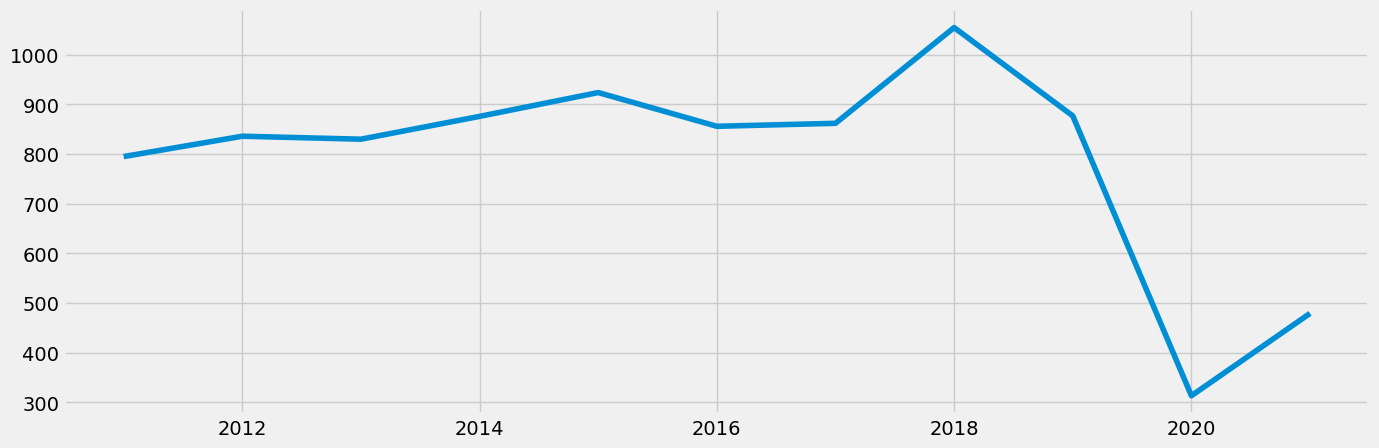

In [110]:
# Plot the data using matplotlib.

food_line_chart = plt.figure(figsize=(15,5), dpi=100) 

plt.plot(year_counts)

In the line chart it seams that the dataset is not stationary. There is a huge decrease on the number of illnesses between 2018 and 2020.

In [111]:
food_line_chart.savefig (os.path.join (path, 'time_series_linechart.png'))

### 2. Time-series analysis: decomposition

In [115]:
# Decompose the time series using an additive model

food_df_2 = food_df.set_index('Year')


In [116]:
decomposition_food = sm.tsa.seasonal_decompose(food_df_2, model='additive', period = 10)

In [117]:
# Fixing size
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

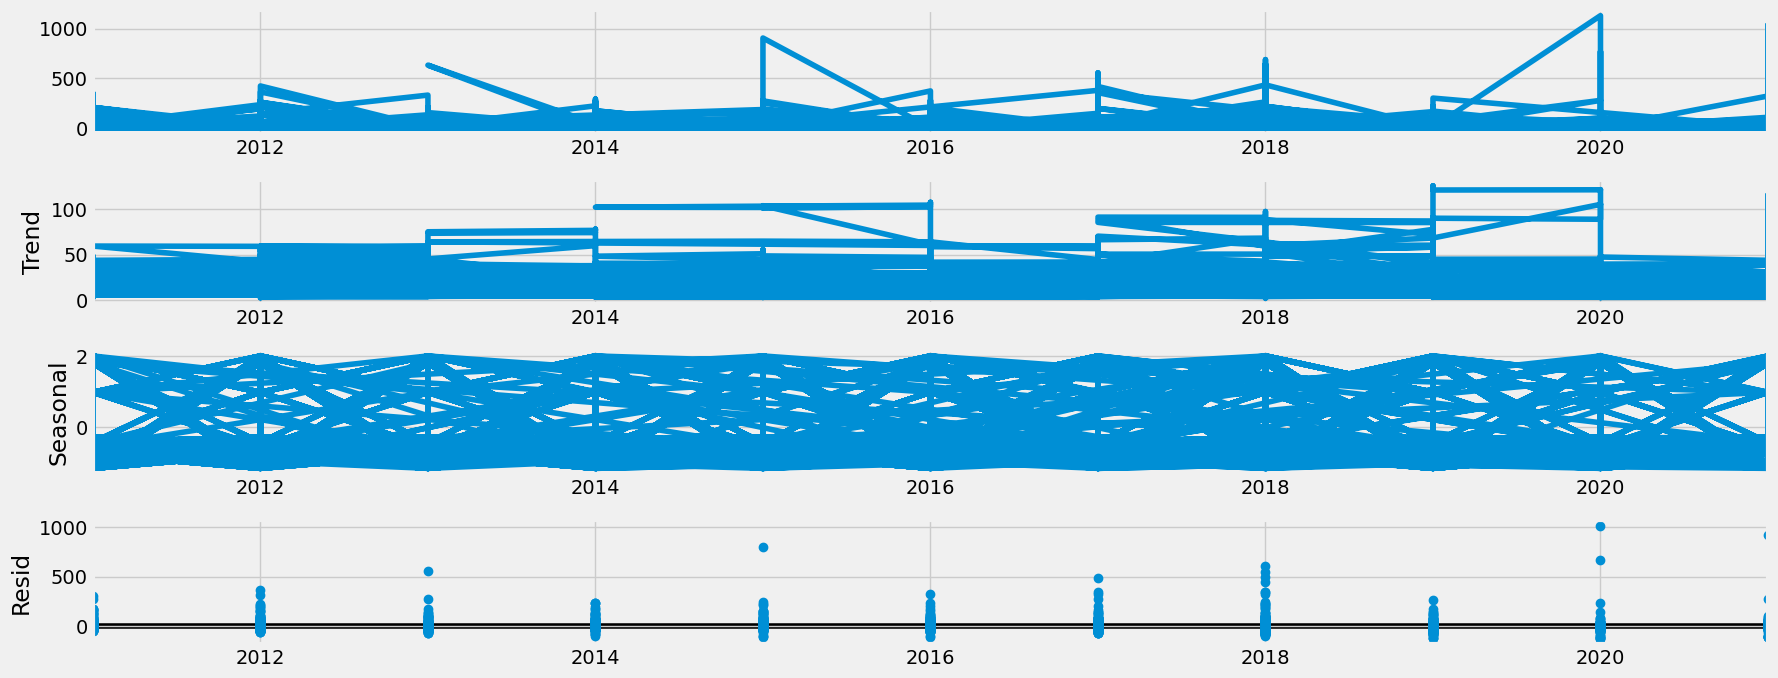

In [118]:
# Plot the separate components

decomposition_food.plot()
plt.show()

# 3. Dickey-Fuller test

Hyphotesis:

h0 : A unit root is present on this dataset (the data is non-stationary)

h1 : A unit root is not present on this dataset (the data is stationary)

In [119]:

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(food_df_2['Number of Illnesses'])

Dickey-Fuller Stationarity test:
Test Statistic                  -92.876970
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    8702.000000
Critical Value (1%)              -3.431102
Critical Value (5%)              -2.861872
Critical Value (10%)             -2.566947
dtype: float64


As the p value was significant (>0.05), for all critical values, we can reject the null hypothesis and say that the data is stationary besides the linechart result. 

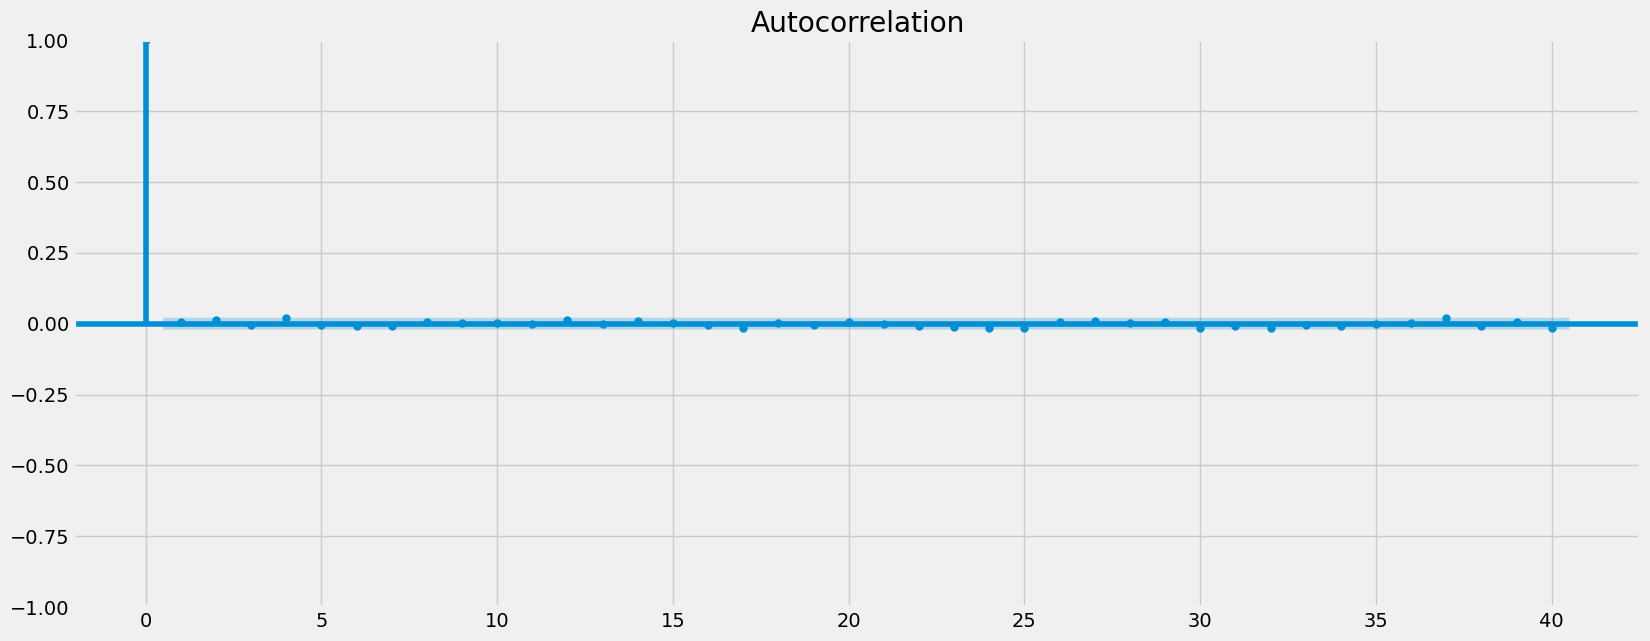

In [122]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(food_df_2)
plt.show()